# Time resampling

* 시간 기준으로 데이터를 Aggregation
* Groupby와 유사
  * 훨씬 간단하고 다양한 기능 제공

* [Kaggle의 Bike-Sharing-Demand](https://www.kaggle.com/competitions/bike-sharing-demand/data)를 이용

In [1]:
import pandas as pd
import os

In [2]:
# 데이터가 담긴 폴더와 train.csv을 os.path.join해서 절대주소 생성
DATA_DIR = "bike_sharing_demand"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")

* pd.read_csv()의 parse_dates

In [46]:
# 데이터를 불러올 때 datetime에 해당하는 index가 정리가 잘 되어 있다면
# parse_dates를 사용해 불러올 수 있음
df = pd.read_csv(TRAIN_PATH, parse_dates = ['datetime'])
df.set_index("datetime", inplace = True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* GroupBy를 이용한 월별 자전거 수요량

In [4]:
# df의 index에서 연, 월만 뽑아 새 column 생성 후 groupby
df["month"] = df.index.month
df["year"] = df.index.year
df.groupby(["year", "month"])["count"].sum().reset_index()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


## Resampling

> `resample()`

* df의 index가 datetime type이어야만 사용할 수 있음.
* 자주 사용하는 순서대로 알파벳의 user guide가 제공됨
  * [pandas resample() user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
  * 여기에서 검색
  * "M" : 월별, "Q" : 분기별, "W" : 주별, "D" : 일별 등  

In [5]:
# 월별 합
df["count"].resample("M").sum()

datetime
2011-01-31     23552
2011-02-28     32844
2011-03-31     38735
2011-04-30     50517
2011-05-31     79713
2011-06-30     89776
2011-07-31     92848
2011-08-31     83296
2011-09-30     79104
2011-10-31     79522
2011-11-30     70889
2011-12-31     61183
2012-01-31     56332
2012-02-29     66269
2012-03-31     94766
2012-04-30    116885
2012-05-31    120434
2012-06-30    130957
2012-07-31    121769
2012-08-31    130220
2012-09-30    133425
2012-10-31    127912
2012-11-30    105551
2012-12-31     98977
Freq: M, Name: count, dtype: int64

<AxesSubplot:xlabel='datetime'>

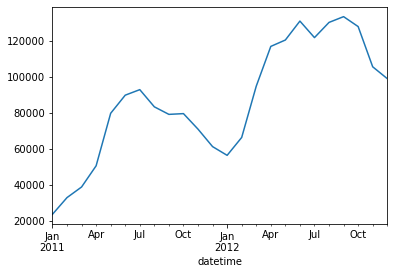

In [11]:
df["count"].resample("M").sum().plot()
# 겨울보단 여름에 많이 자전거를 대여함

In [7]:
# 분기별 합
df["count"].resample("Q").sum()

datetime
2011-03-31     95131
2011-06-30    220006
2011-09-30    255248
2011-12-31    211594
2012-03-31    217367
2012-06-30    368276
2012-09-30    385414
2012-12-31    332440
Freq: Q-DEC, Name: count, dtype: int64

<AxesSubplot:xlabel='datetime'>

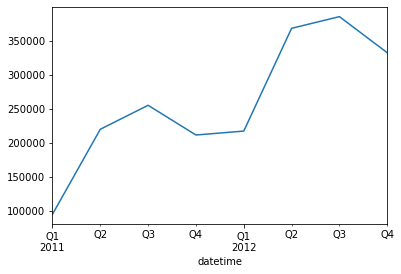

In [8]:
df["count"].resample("Q").sum().plot()

In [9]:
# 일별 합
df["count"].resample("D").sum()

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

<AxesSubplot:xlabel='datetime'>

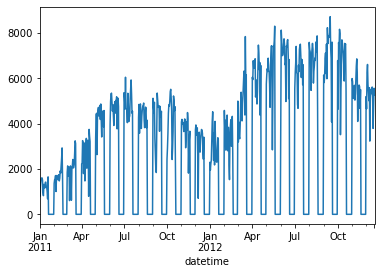

In [10]:
df["count"].resample("D").sum().plot()

## Resampling - Filter

* something_range 함수로 기간 생성 : Filter 지정
  * date_range, timedelta_range, period_range, interval_range 등

In [17]:
# start와 end를 지정해서 DatetimeIndex 추출
pd.date_range(start = '1/1/2018', end = '1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

* freq

In [22]:
# start와 end의 기간 동안 월별로 데이터 추출
period = pd.date_range(start="2011-01-01", end="2012-01-30", freq="M")
df["count"].resample("M").sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

In [27]:
# slicing처럼도 가능
df["count"].resample("M").sum()["2011-01-01":"2012-01-30"]

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

* plot 그리기 가능

<AxesSubplot:xlabel='datetime'>

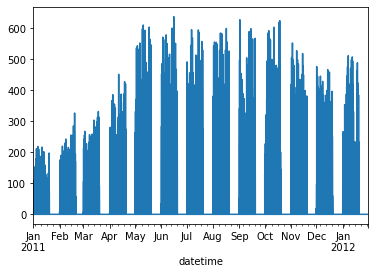

In [34]:
# 3T : 3시간 간격
df["count"].resample("3T").sum()["2011-01-01":"2012-01-30"].plot()

* periods : end date없이 추출하는 횟수를 지정

In [30]:
period = pd.date_range(start="2011-01-01", periods = 12, freq = "M")
df["count"].resample("M").sum()[period]


2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

* 요일별 자전거 수요량의 평균

<AxesSubplot:xlabel='dayofweek'>

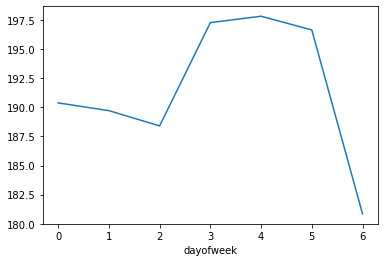

In [45]:
# API에서 요일을 의미하는 'dayofweek'를 찾음
# dayofweek column을 새로 생성
# monday : 0, sunday : 6
df["dayofweek"] = df.index.dayofweek
df.groupby(["dayofweek"])["count"].mean().plot()

=> 목, 금, 토요일에 가장 많이 대여, 일요일에 가장 적게 대여